<a href="https://colab.research.google.com/github/Mossai-r/LungCancer_Prediction-using-KNN/blob/main/Framingham_Heart_Disease_Prediction_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Importing pandas library

import pandas as pd # For data manipulation and analysis



1.Loading the data

In [61]:

df=pd.read_csv("/content/framingham_heart_study.csv") # Read the CSV file into a pandas DataFrame

2.Exploring the data

In [62]:
df.head() # Displaying the first few rows of the dataset to understand its structure and contents

df.shape  # Displaying the shape of the dataset to check the number of rows and columns

# Checking for missing values in the dataset
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


3. Data cleaning

In [63]:
# Dropping the 'education' column because it is irrelevant for predicting CHD risk
a=df.drop(["education"],axis=1,inplace=True)

3.1 Missing value handling  
    Filling the missing value we need to see the test and train data simultaneously.
    We will be replacing the null values with mode for categorical values and mean for continous values.

In [65]:
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].mode()[0]) # Filling missing values in 'cigsPerDay'
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [66]:
df["BPMeds"]=df["BPMeds"].fillna(df["BPMeds"].mode()[0]) # Filling missing values in 'BPMeds'
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [67]:
df["totChol"]=df["totChol"].fillna(df["totChol"].mean()) # Filling missing values in 'totChol'
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [68]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean()) # Filling missing values in 'BMI'
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [69]:
df["heartRate"]=df["heartRate"].fillna(df["heartRate"].mean())  # Filling missing values in 'heartRate'
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [70]:
df["glucose"]=df["glucose"].fillna(df["glucose"].mode()[0])  # Filling missing values in 'glucose'

# Verifying that all missing values have been handled
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [71]:
# Displaying dataset information to check data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


3.2  Feature and Target Extraction

In [72]:
# Extracting features (X) and target variable (y)
X=df.iloc[:,0:-1].values # All columns except the last one are features

y=df.iloc[:,-1].values # The last column is the target variable (CHD risk)
y

array([0, 0, 0, ..., 0, 0, 0])

3.3 Splitting the Dataset into Training and Testing Sets

In [73]:
# Splitting the dataset into training and testing sets (70% training, 30% testing)
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
X_train.shape

(2968, 14)

3.4 Data Scaling

In [75]:
# Standardizing the features to ensure all variables are on the same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # Initialize the StandardScaler
sc.fit(X_train) # Fit the scaler on the training data
X_train=sc.transform(X_train) # Transform the training data
X_test=sc.transform(X_test) # Transform the testing data

4. Model Training and Evaluation

In [76]:
# Training a Support Vector Classifier (SVC) with a polynomial kernel

from sklearn.svm import SVC # Support Vector Classifier for prediction
clf=SVC(kernel="poly") # Initialize the SVC model with a polynomial kernel
clf.fit(X_train,y_train)  # Train the model on the training data

# Making predictions on the test set
y_pred=clf.predict(X_test) # Predict the target variable for the test set
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
# Evaluating the model's performance
from sklearn.metrics import accuracy_score # Calculate the accuracy score
print(accuracy_score(y_test,y_pred)*100) # Print the accuracy score

84.98427672955975


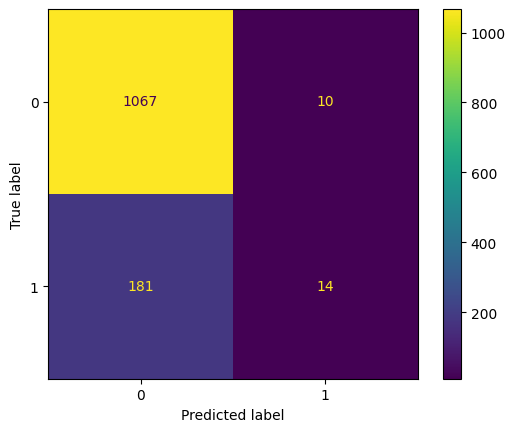

In [78]:
# Displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Generate the confusion matrix
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred) # Plot the confusion matrix
cm

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) # Generating a classification report

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1077
           1       0.58      0.07      0.13       195

    accuracy                           0.85      1272
   macro avg       0.72      0.53      0.52      1272
weighted avg       0.81      0.85      0.80      1272

